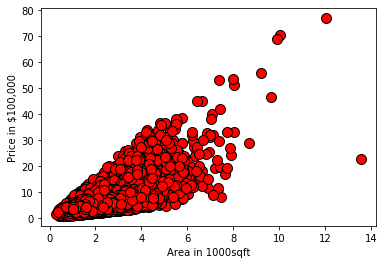

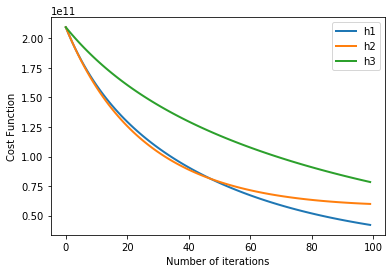

In [42]:
import os
import numpy as np
from matplotlib import pyplot
import pandas as pd

df = pd.read_csv("house_data_complete.csv").dropna()
train1, validate1, test1 = np.split(df, [int(.6*len(df)),int(.8*len(df))])

X_axis = df[['sqft_living']]/1000
Y_axis = df[['price']]/100000

fig = pyplot.figure()  
pyplot.plot(X_axis, Y_axis, 'ro', ms=10, mec='k')
pyplot.ylabel('Price in $100,000')
pyplot.xlabel('Area in 1000sqft')



def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)    
    X_norm = (X - mu) / sigma
    return X_norm



X1 = train1.drop(columns=['price', 'date']).values
y1 = train1.values[:,2]
m = y1.size
X1_norm = featureNormalize(X1)
X1 = np.concatenate([np.ones((m, 1)), X1_norm], axis=1)

theta0 = np.zeros(X1.shape[1])
h1 = np.dot(X1, theta0)
h2 = np.dot(np.power(X1,2) , theta0)
h3 = np.dot(X1/2 , theta0)


lambda1 = 1

def costFunction(theta, X, y, h, lambda2):
    m= y.size
    J= np.dot((h - y), (h - y)) / (2 * m) + ((lambda1/(2 * m))* np.sum(np.dot(theta, theta)))
    return J



cost = costFunction(theta0, X1, y1, h1, lambda1)
cost2 = costFunction(theta0, X1, y1, h2, lambda1)
cost3 = costFunction(theta0, X1, y1, h3, lambda1)

#print('Cost at initial theta (zeros): {:.3f}'.format(cost3))

def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  # Use a python list to save cost in every iteration

    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(X, theta)
        theta = theta*(1 - (alpha*lambda1)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunction(theta, X, y, h, lambda1))

    return theta, J_history

def gradientDescent2(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  # Use a python list to save cost in every iteration

    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(np.power(X,2), theta)
        theta = theta*(1 - (alpha*lambda1)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunction(theta, X, y, h, lambda1))

    return theta, J_history

def gradientDescent3(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  # Use a python list to save cost in every iteration

    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(X/2, theta)
        theta = theta*(1 - (alpha*lambda1)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunction(theta, X, y, h, lambda1))

    return theta, J_history

iterations = 100
alpha = 0.01
alpha2 = 0.003
theta, J_history = gradientDescent(X1,y1, theta0, alpha, iterations)
theta2, J_history2 = gradientDescent2(X1,y1, theta0, alpha2, iterations)
theta3, J_history3 = gradientDescent3(X1,y1, theta0, alpha, iterations)


pyplot.figure()
pyplot.plot(np.arange(len(J_history)), J_history, lw=2, label='h1')
pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2, label='h2')
pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2, label='h3')
pyplot.legend()
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost Function')
pyplot.show()


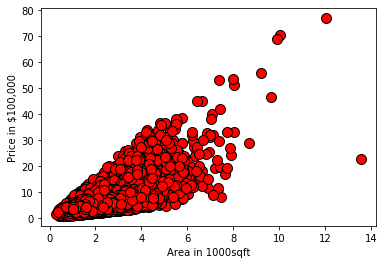

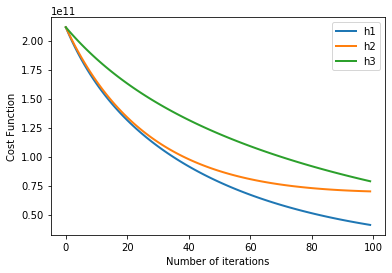

In [43]:
df = pd.read_csv("house_data_complete.csv").dropna()
validate2, test2, train2 = np.split(df, [int(.2*len(df)),int(.4*len(df))])

X_axis = df[['sqft_living']]/1000
Y_axis = df[['price']]/100000

fig = pyplot.figure()  
pyplot.plot(X_axis, Y_axis, 'ro', ms=10, mec='k')
pyplot.ylabel('Price in $100,000')
pyplot.xlabel('Area in 1000sqft')



def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)    
    X_norm = (X - mu) / sigma
    return X_norm



X2 = train2.drop(columns=['price', 'date']).values
y2 = train2.values[:,2]
m = y2.size
X2_norm = featureNormalize(X2)
X2 = np.concatenate([np.ones((m, 1)), X2_norm], axis=1)

theta0 = np.zeros(X2.shape[1])
h1 = np.dot(X2, theta0)
h2 = np.dot(np.power(X2,2) , theta0)
h3 = np.dot(X2/2 , theta0)


lambda2 = 1

def costFunction(theta, X, y, h, lambda2):
    m= y.size
    J= np.dot((h - y), (h - y)) / (2 * m) + ((lambda2/(2 * m))* np.sum(np.dot(theta, theta)))
    return J



cost = costFunction(theta0, X2, y2, h1, lambda2)
cost2 = costFunction(theta0, X2, y2, h2, lambda2)
cost3 = costFunction(theta0, X2, y2, h3, lambda2)

#print('Cost at initial theta (zeros): {:.3f}'.format(cost3))

def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  # Use a python list to save cost in every iteration

    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(X, theta)
        theta = theta*(1 - (alpha*lambda2)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunction(theta, X, y, h, lambda2))

    return theta, J_history

def gradientDescent2(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  # Use a python list to save cost in every iteration

    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(np.power(X,2), theta)
        theta = theta*(1 - (alpha*lambda2)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunction(theta, X, y, h, lambda2))

    return theta, J_history

def gradientDescent3(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  # Use a python list to save cost in every iteration

    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(X/2, theta)
        theta = theta*(1 - (alpha*lambda2)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunction(theta, X, y, h, lambda2))

    return theta, J_history

iterations = 100
alpha = 0.01
alpha2 = 0.003
theta, J_history = gradientDescent(X2,y2, theta0, alpha, iterations)
theta2, J_history2 = gradientDescent2(X2,y2, theta0, alpha2, iterations)
theta3, J_history3 = gradientDescent3(X2,y2, theta0, alpha, iterations)


pyplot.figure()
pyplot.plot(np.arange(len(J_history)), J_history, lw=2, label='h1')
pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2, label='h2')
pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2, label='h3')
pyplot.legend()
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost Function')
pyplot.show()


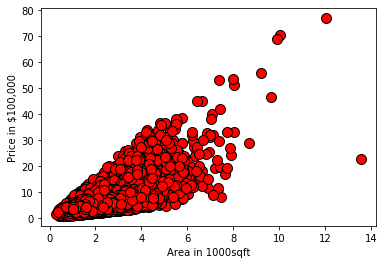

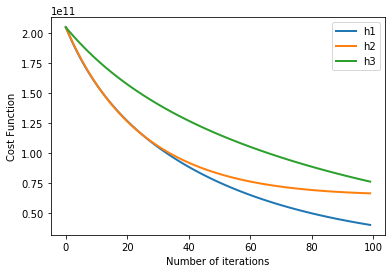

In [44]:
df = pd.read_csv("house_data_complete.csv").dropna()
test3, train3, validate3  = np.split(df, [int(.2*len(df)),int(.8*len(df))])

X_axis = df[['sqft_living']]/1000
Y_axis = df[['price']]/100000

fig = pyplot.figure()  
pyplot.plot(X_axis, Y_axis, 'ro', ms=10, mec='k')
pyplot.ylabel('Price in $100,000')
pyplot.xlabel('Area in 1000sqft')



def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)    
    X_norm = (X - mu) / sigma
    return X_norm



X3 = train3.drop(columns=['price', 'date']).values
y3 = train3.values[:,2]
m = y3.size
X3_norm = featureNormalize(X3)
X3 = np.concatenate([np.ones((m, 1)), X3_norm], axis=1)

theta0 = np.zeros(X3.shape[1])
h1 = np.dot(X3, theta0)
h2 = np.dot(np.power(X3,2) , theta0)
h3 = np.dot(X3/2 , theta0)


lambda3 = 1

def costFunction(theta, X, y, h, lambda3):
    m= y.size
    J= np.dot((h - y), (h - y)) / (2 * m) + ((lambda3/(2 * m))* np.sum(np.dot(theta, theta)))
    return J



cost = costFunction(theta0, X2, y2, h1, lambda3)
cost2 = costFunction(theta0, X2, y2, h2, lambda3)
cost3 = costFunction(theta0, X2, y2, h3, lambda3)

#print('Cost at initial theta (zeros): {:.3f}'.format(cost3))

def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  # Use a python list to save cost in every iteration

    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(X, theta)
        theta = theta*(1 - (alpha*lambda3)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunction(theta, X, y, h, lambda3))

    return theta, J_history

def gradientDescent2(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  # Use a python list to save cost in every iteration

    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(np.power(X,2), theta)
        theta = theta*(1 - (alpha*lambda3)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunction(theta, X, y, h, lambda3))

    return theta, J_history

def gradientDescent3(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  # Use a python list to save cost in every iteration

    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(X/2, theta)
        theta = theta*(1 - (alpha*lambda3)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunction(theta, X, y, h, lambda3))

    return theta, J_history

iterations = 100
alpha = 0.01
alpha2 = 0.003
theta, J_history = gradientDescent(X3,y3, theta0, alpha, iterations)
theta2, J_history2 = gradientDescent2(X3,y3, theta0, alpha2, iterations)
theta3, J_history3 = gradientDescent3(X3,y3, theta0, alpha, iterations)


pyplot.figure()
pyplot.plot(np.arange(len(J_history)), J_history, lw=2, label='h1')
pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2, label='h2')
pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2, label='h3')
pyplot.legend()
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost Function')
pyplot.show()
